In [1]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Simple Gene Regulation
Higher the degradation/dilution rate the faster the profile reaches the steady state and similarly has faster response time. Production rate does not have any effect on increase in protein levels.

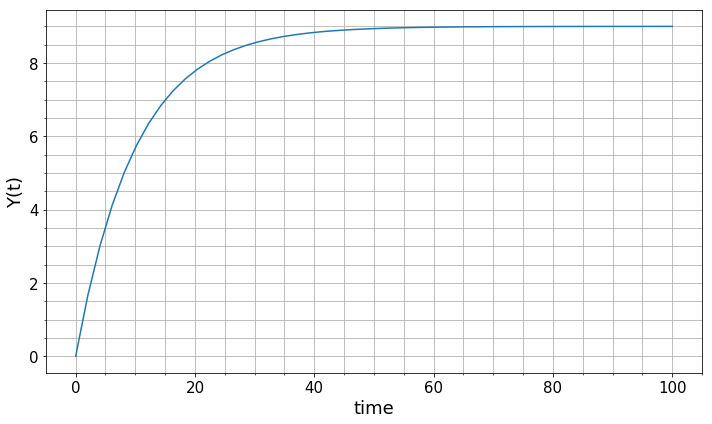

Response Time: 6.93


In [2]:
# function that returns dY/dt
def model(Y,t,B,a):
    # B : Production Rate
    # a : degradation Rate
    dydt = B - (a* Y)
    return dydt

# initial condition
Y0 = 0
# time points
t = np.linspace(0,100)

B = 0.9
a = 0.1
# solve ODE
Y = odeint(model,Y0,t,args=(B,a))
Y = Y.reshape(Y.shape[0],)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t,Y)
plt.grid(which='both')
plt.minorticks_on()
plt.xlabel('time', fontsize=18)
plt.ylabel('Y(t)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

Tr = math.log(2)/a
print("Response Time: %.2f"%Tr)

Response Time: 6.93
Response Time: 3.47
Response Time: 2.31
Response Time: 1.73
Response Time: 1.39
Response Time: 1.16
Response Time: 0.99
Response Time: 0.87
Response Time: 0.77
Response Time: 0.69


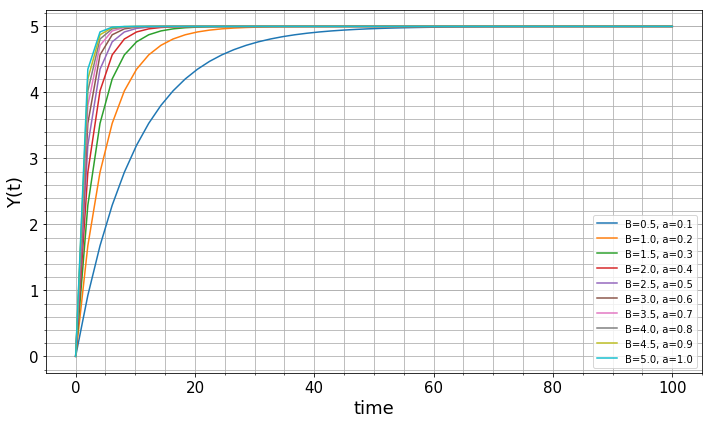

In [3]:
Yst = 5 # assuming steady state value to be 5
a = np.arange(0,1,0.1)+0.1 # assuming degradation vaue varying from 0.1 to 1 with interval of 0.1
B = Yst*a # Because Yst = B/a

plt.figure(figsize=(10, 6))
for i in range(len(B)):
    Y = odeint(model,Y0,t,args=(B[i],a[i]))
    Y = Y.reshape(Y.shape[0],)
    Tr = math.log(2)/a[i]
    print("Response Time: %.2f"%Tr)
    # plot results
    plt.plot(t,Y, label = 'B=%.1f, a=%.1f'%(B[i],(a[i])))
    
plt.grid(which='both')
plt.minorticks_on()
plt.xlabel('time', fontsize=18)
plt.ylabel('Y(t)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.legend(loc='best')
plt.show()



# Regulatory Cascade

For **Y** the model will behave same as before but since **Z** is dependent on production of **Y** (until **Y** reaches threshold **Ky** ). If the time needed for **Y** to reach **Ky** is **Tz** then production of **Z** will only start after **Tz**.

In case of pulse of duration **D** it would be necessary for the pulse duration to be more than **Tz** otherwise **Z** will not be produced because **Y** did not reach the threshold value **Ky**. For example for the parameters set here the **D** needs to be more than 4.8 

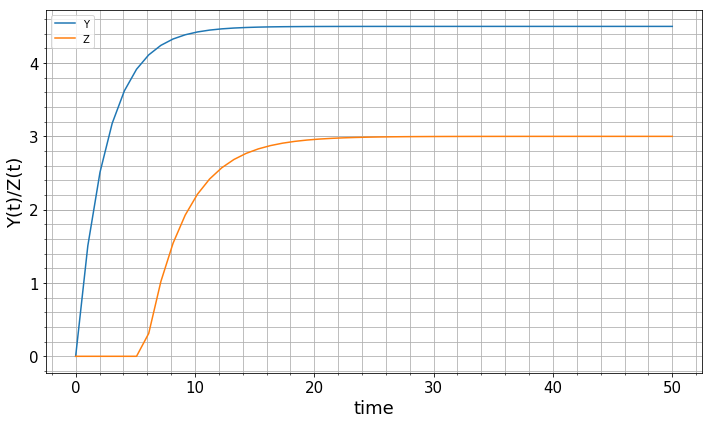

In [4]:
# model for Y
def modelY(Y,t,By,ay):
    # By : Production Rate of Y
    # ay : degradation Rate of Y
    dydt = By - (ay* Y)
    return dydt

# model for Z
def modelZ(Z,t,Bz,az,Tz):
    # Bz : Production Rate of Z
    # az : degradation Rate of Z
    # Tz : Time after which Z starts
    if t<Tz:
        dzdt = 0
    else:
        dzdt = Bz - (az* Z)
    return dzdt

# initial condition
Y0 = 0
Z0 = 0
# time points
t = np.linspace(0,50)
By = 1.8
ay = 0.4

Bz = 0.9
az = 0.3

# solve ODE
Y = odeint(modelY,Y0,t,args=(By,ay))
Y = Y.reshape(Y.shape[0],)

Yst = By/ay # steady state value of Y
Ky = Yst*0.90 # assuming the threshold after which Z starts production
Tz = 1/ay*(math.log(Yst/(Yst-Ky))) # Time after which Z starts production

Z = odeint(modelZ,Z0,t,args=(Bz,az,Tz))
Z = Z.reshape(Z.shape[0],)


# plot results
plt.figure(figsize=(10, 6))
plt.plot(t,Y, label = 'Y')
plt.plot(t,Z, label = 'Z')
plt.grid(which='both')
plt.minorticks_on()
plt.xlabel('time', fontsize=18)
plt.ylabel('Y(t)/Z(t)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

4.815891217303744
2.8


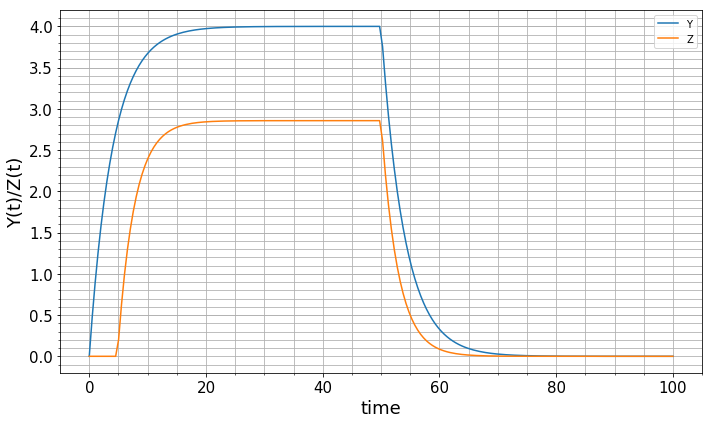

In [5]:
# model for Y
def modelY(Y,t,By,ay,D):
    # By : Production Rate of Y
    # ay : degradation Rate of Y
    # D: Pulse duration
    if t < D:
        dydt = By - (ay* Y)
    else:
        dydt = - (ay* Y)
    return dydt

# model for Z
def modelZ(Z,t,Bz,az,Tz,D):
    # Bz : Production Rate of Z
    # az : degradation Rate of Z
    # Tz : Time after which Z starts
    # D : Pulse Duration
    if t<Tz:
        dzdt = 0
    if t>Tz and t<D:
        dzdt = Bz - (az* Z)
    if t>D:
        dzdt = - (az* Z)
    return dzdt

# initial condition
Y0 = 0
Z0 = 0
# time points
t = np.linspace(0,100,200)
D = 50
By = 1
ay = 0.25

Bz = 1.0
az = 0.35

# solve ODE
Y = odeint(modelY,Y0,t,args=(By,ay,D))
Y = Y.reshape(Y.shape[0],)

Yst = By/ay # steady state value of Y
Ky = Yst*0.70 # assuming the threshold after which Z starts production
Tz = 1/ay*(math.log(Yst/(Yst-Ky))) # Time after which Z starts
print(Tz)
print(Ky)

Z = odeint(modelZ,Z0,t,args=(Bz,az,Tz,D))
Z = Z.reshape(Z.shape[0],)


# plot results
plt.figure(figsize=(10, 6))
plt.plot(t,Y, label = 'Y')
plt.plot(t,Z, label = 'Z')
plt.grid(which='both')
plt.minorticks_on()
plt.xlabel('time', fontsize=18)
plt.ylabel('Y(t)/Z(t)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim(0,20)
plt.legend(loc='best')
plt.tight_layout()
plt.show()